In [1]:
import numpy as np #linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS # for data visualization
import folium  #for visualizing geospatial data
from matplotlib.pyplot import figure, show
import plotly.graph_objects as go
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import os  # accessing directory structur
import time
from matplotlib import cm
import pylab as pl

%matplotlib inline

In [4]:
details_df = pd.read_csv(r"C:\Users\Arya\OneDrive\Documents\all_season_details.csv", index_col=None ,low_memory=False)
batting_df = pd.read_csv(r"C:\Users\Arya\OneDrive\Documents\all_season_batting_card.csv" , index_col=None ,low_memory=False )
summary_df = pd.read_csv(r"C:\Users\Arya\OneDrive\Documents\all_season_summary.csv", index_col=None , low_memory=False)
bowling_df = pd.read_csv(r"C:\Users\Arya\OneDrive\Documents\all_season_bowling_card.csv", index_col=None , low_memory=False)

In [5]:
print('shape of summary dataframe', summary_df.shape)
print('shape of details dataframe', details_df.shape)
print('shape of batting dataframe', batting_df.shape)
print('shape of bowling dataframe', bowling_df.shape)

shape of summary dataframe (1032, 45)
shape of details dataframe (242550, 45)
shape of batting dataframe (15720, 25)
shape of bowling dataframe (12121, 24)


In [6]:
summary_df.info()
details_df.info()
batting_df.info()
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1029 non-null   float64
 1   id                1032 non-null   int64  
 2   name              1032 non-null   object 
 3   short_name        1032 non-null   object 
 4   description       1032 non-null   object 
 5   home_team         1032 non-null   object 
 6   away_team         1032 non-null   object 
 7   toss_won          1029 non-null   object 
 8   decision          1029 non-null   object 
 9   1st_inning_score  1021 non-null   object 
 10  2nd_inning_score  1019 non-null   object 
 11  home_score        1024 non-null   object 
 12  away_score        1021 non-null   object 
 13  winner            1032 non-null   object 
 14  result            1032 non-null   object 
 15  start_date        1032 non-null   object 
 16  end_date          1032 non-null   object 


In [7]:
details_cols = set(details_df.columns)
batting_cols = set(batting_df.columns)
bowling_cols = set(bowling_df.columns)
summary_cols = set(summary_df.columns)

# Find the common columns
common_cols = details_cols.intersection(batting_cols, bowling_cols, summary_cols)

print("Columns with the same name in all four DataFrames:", common_cols)


Columns with the same name in all four DataFrames: {'home_team', 'away_team', 'season'}


In [8]:
columns_to_drop = columns_to_drop = ['comment_id', 'match_name', 'current_innings', 'innings_id', 'shortText','wkt_text', 'isRetiredHurt', 'text', 'preText', 'postText']
details_df.drop(columns=columns_to_drop, inplace=True)

In [9]:
columns_to_drop = columns_to_drop = ['name', 'short_name', 'description', '1st_inning_score', '2nd_inning_score', 'home_score', 'away_score', 'venue_id', 'points', 'super_over', 'highlights', 'home_playx1', 'away_playx1']
summary_df.drop(columns=columns_to_drop, inplace=True)

In [10]:
columns_to_drop = columns_to_drop = ['match_name','minutes','fullName', 'shortText','strikeRate','captain','runningScore','runningOver','isNotOut','commentary', 'link']
batting_df.drop(columns=columns_to_drop, inplace=True)

In [11]:
columns_to_drop = columns_to_drop = ['href','captain','bowling_team','match_name','fullName','maidens','foursConceded','dots','sixesConceded']
bowling_df.drop(columns=columns_to_drop, inplace=True)

In [12]:
print('shape of summary dataframe', summary_df.shape)
print('shape of details dataframe', details_df.shape)
print('shape of batting dataframe', batting_df.shape)
print('shape of bowling dataframe', bowling_df.shape)

shape of summary dataframe (1032, 32)
shape of details dataframe (242550, 35)
shape of batting dataframe (15720, 14)
shape of bowling dataframe (12121, 15)


In [13]:
summary_df.info()
details_df.info()
batting_df.info()
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1029 non-null   float64
 1   id                1032 non-null   int64  
 2   home_team         1032 non-null   object 
 3   away_team         1032 non-null   object 
 4   toss_won          1029 non-null   object 
 5   decision          1029 non-null   object 
 6   winner            1032 non-null   object 
 7   result            1032 non-null   object 
 8   start_date        1032 non-null   object 
 9   end_date          1032 non-null   object 
 10  venue_name        1032 non-null   object 
 11  home_captain      1029 non-null   object 
 12  away_captain      1029 non-null   object 
 13  pom               1029 non-null   object 
 14  home_overs        1021 non-null   float64
 15  home_runs         1021 non-null   float64
 16  home_wickets      1021 non-null   float64


In [14]:
import pandas as pd

# Assuming df is your DataFrame
cols_to_sum = ['overs', 'conceded', 'wickets', 'noballs']
# Convert columns to float if needed
bowling_df[cols_to_sum] = bowling_df[cols_to_sum].astype(float)

# Group by "match_id" and sum the specified columns
bowling_df_grouped = bowling_df.groupby('match_id', as_index=False)[cols_to_sum].sum()

# Drop duplicate rows with the same 'match_id'
bowling_df.drop_duplicates(subset='match_id', inplace=True)

# Merge the grouped DataFrame back to the original DataFrame
bowling_df_merged = pd.merge(bowling_df, bowling_df_grouped, on='match_id', how='left')


In [15]:
bowling_df_merged.head(15)

season  match_id home_team away_team  \
0   2023.0   1359475        GT       CSK   
1   2023.0   1359476      PBKS       KKR   
2   2023.0   1359477       LSG        DC   
3   2023.0   1359478       SRH        RR   
4   2023.0   1359479       RCB        MI   
5   2023.0   1359480       CSK       LSG   
6   2023.0   1359481        DC        GT   
7   2023.0   1359482        RR      PBKS   
8   2023.0   1359483       KKR       RCB   
9   2023.0   1359484       LSG       SRH   
10  2023.0   1359485        RR        DC   
11  2023.0   1359486        MI       CSK   
12  2023.0   1359487        GT       KKR   
13  2023.0   1359488       SRH      PBKS   
14  2023.0   1359489       RCB       LSG   

                                                venue        city country  \
0            Narendra Modi Stadium, Motera, Ahmedabad   Ahmedabad   India   
1   Punjab Cricket Association IS Bindra Stadium, ...  Chandigarh   India   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...     Lucknow   India   
3   Rajiv Gandhi International Stadium, Uppal, Hyd...   Hyderabad   India   
4                    M.Chinnaswamy Stadium, Bengaluru   Bengaluru   India   
5            MA Chidambaram Stadium, Chepauk, Chennai     Chennai   India   
6                         Arun Jaitley Stadium, Delhi       Delhi   India   
7                 Barsapara Cricket Stadium, Guwahati    Guwahati   India   
8                               Eden Gardens, Kolkata     Kolkata   India   
9   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...     Lucknow   India   
10                Barsapara Cricket Stadium, Guwahati    Guwahati   India   
11                           Wankhede Stadium, Mumbai      Mumbai   India   
12           Narendra Modi Stadium, Motera, Ahmedabad   Ahmedabad   India   
13  Rajiv Gandhi International Stadium, Uppal, Hyd...   Hyderabad   India   
14                   M.Chinnaswamy Stadium, Bengaluru   Bengaluru   India   

    innings_id            name  overs_x  conceded_x  wickets_x economyRate  \
0            1  Mohammed Shami      4.0        29.0        2.0        7.25   
1            1        UT Yadav      4.0        27.0        1.0        6.75   
2            1        KK Ahmed      4.0        30.0        2.0         7.5   
3            1         B Kumar      3.0        36.0        0.0        12.0   
4            1  Mohammed Siraj      4.0        21.0        1.0        5.25   
5            1       KR Mayers      2.0        16.0        0.0         8.0   
6            1  Mohammed Shami      4.0        41.0        3.0       10.25   
7            1        TA Boult      4.0        38.0        0.0         9.5   
8            1  Mohammed Siraj      4.0        44.0        1.0        11.0   
9            1       KR Mayers      1.0         5.0        0.0         5.0   
10           1        KK Ahmed      2.0        31.0        0.0        15.5   
11           1       DL Chahar      1.0        10.0        0.0        10.0   
12           1        UT Yadav      3.0        24.0        0.0         8.0   
13           1         B Kumar      4.0        33.0        1.0        8.25   
14           1      JD Unadkat      2.0        27.0        0.0        13.5   

    wides  noballs_x  overs_y  conceded_y  wickets_y  noballs_y  
0       0        1.0     39.2       347.0       12.0        3.0  
1       0        0.0     36.0       333.0       12.0        3.0  
2       1        0.0     40.0       333.0       15.0        1.0  
3       1        0.0     40.0       327.0       13.0        3.0  
4       6        0.0     36.2       342.0        9.0        1.0  
5       1        0.0     40.0       412.0       14.0        4.0  
6       4        0.0     38.1       319.0       12.0        2.0  
7       1        0.0     40.0       387.0       10.0        1.0  
8       3        1.0     37.4       312.0       17.0        3.0  
9       0        0.0     36.0       244.0       12.0        0.0  
10      2        0.0     40.0       338.0       13.0        2.0  
11      0        0.0     

In [16]:
import pandas as pd

# Assuming df is your DataFrame
cols_to_sum = ['runs','ballsFaced','fours','sixes']
# Convert columns to float if needed
batting_df[cols_to_sum] = batting_df[cols_to_sum].astype(float)

# Group by "match_id" and sum the specified columns
batting_df_grouped = batting_df.groupby('match_id', as_index=False)[cols_to_sum].sum()

# Drop duplicate rows with the same 'match_id'
batting_df.drop_duplicates(subset='match_id', inplace=True)

# Merge the grouped DataFrame back to the original DataFrame
batting_df_merged = pd.merge(batting_df, batting_df_grouped, on='match_id', how='left')

In [17]:
bowling_df_merged.head(15)

season  match_id home_team away_team  \
0   2023.0   1359475        GT       CSK   
1   2023.0   1359476      PBKS       KKR   
2   2023.0   1359477       LSG        DC   
3   2023.0   1359478       SRH        RR   
4   2023.0   1359479       RCB        MI   
5   2023.0   1359480       CSK       LSG   
6   2023.0   1359481        DC        GT   
7   2023.0   1359482        RR      PBKS   
8   2023.0   1359483       KKR       RCB   
9   2023.0   1359484       LSG       SRH   
10  2023.0   1359485        RR        DC   
11  2023.0   1359486        MI       CSK   
12  2023.0   1359487        GT       KKR   
13  2023.0   1359488       SRH      PBKS   
14  2023.0   1359489       RCB       LSG   

                                                venue        city country  \
0            Narendra Modi Stadium, Motera, Ahmedabad   Ahmedabad   India   
1   Punjab Cricket Association IS Bindra Stadium, ...  Chandigarh   India   
2   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...     Lucknow   India   
3   Rajiv Gandhi International Stadium, Uppal, Hyd...   Hyderabad   India   
4                    M.Chinnaswamy Stadium, Bengaluru   Bengaluru   India   
5            MA Chidambaram Stadium, Chepauk, Chennai     Chennai   India   
6                         Arun Jaitley Stadium, Delhi       Delhi   India   
7                 Barsapara Cricket Stadium, Guwahati    Guwahati   India   
8                               Eden Gardens, Kolkata     Kolkata   India   
9   Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...     Lucknow   India   
10                Barsapara Cricket Stadium, Guwahati    Guwahati   India   
11                           Wankhede Stadium, Mumbai      Mumbai   India   
12           Narendra Modi Stadium, Motera, Ahmedabad   Ahmedabad   India   
13  Rajiv Gandhi International Stadium, Uppal, Hyd...   Hyderabad   India   
14                   M.Chinnaswamy Stadium, Bengaluru   Bengaluru   India   

    innings_id            name  overs_x  conceded_x  wickets_x economyRate  \
0            1  Mohammed Shami      4.0        29.0        2.0        7.25   
1            1        UT Yadav      4.0        27.0        1.0        6.75   
2            1        KK Ahmed      4.0        30.0        2.0         7.5   
3            1         B Kumar      3.0        36.0        0.0        12.0   
4            1  Mohammed Siraj      4.0        21.0        1.0        5.25   
5            1       KR Mayers      2.0        16.0        0.0         8.0   
6            1  Mohammed Shami      4.0        41.0        3.0       10.25   
7            1        TA Boult      4.0        38.0        0.0         9.5   
8            1  Mohammed Siraj      4.0        44.0        1.0        11.0   
9            1       KR Mayers      1.0         5.0        0.0         5.0   
10           1        KK Ahmed      2.0        31.0        0.0        15.5   
11           1       DL Chahar      1.0        10.0        0.0        10.0   
12           1        UT Yadav      3.0        24.0        0.0         8.0   
13           1         B Kumar      4.0        33.0        1.0        8.25   
14           1      JD Unadkat      2.0        27.0        0.0        13.5   

    wides  noballs_x  overs_y  conceded_y  wickets_y  noballs_y  
0       0        1.0     39.2       347.0       12.0        3.0  
1       0        0.0     36.0       333.0       12.0        3.0  
2       1        0.0     40.0       333.0       15.0        1.0  
3       1        0.0     40.0       327.0       13.0        3.0  
4       6        0.0     36.2       342.0        9.0        1.0  
5       1        0.0     40.0       412.0       14.0        4.0  
6       4        0.0     38.1       319.0       12.0        2.0  
7       1        0.0     40.0       387.0       10.0        1.0  
8       3        1.0     37.4       312.0       17.0        3.0  
9       0        0.0     36.0       244.0       12.0        0.0  
10      2        0.0     40.0       338.0       13.0        2.0  
11      0        0.0     

In [43]:
import pandas as pd

# Merge the DataFrames, specifying suffixes
merged_df = details_df.merge(batting_df_merged, on='match_id', how='outer', suffixes=('_details', '_batting'))
merged_df = merged_df.merge(bowling_df_merged, on='match_id', how='outer', suffixes=('_merged', '_bowling'))

# Merge with summary_df, specifying suffixes
final_df = merged_df.merge(summary_df, left_on='match_id', right_on='id', how='inner', suffixes=('_merged', '_summary'))


In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242551 entries, 0 to 242550
Columns: 102 entries, season_details to reserve_umpire
dtypes: float64(49), int64(5), object(48)
memory usage: 190.6+ MB


In [45]:
print(final_df.columns.tolist())


['season_details', 'match_id', 'home_team_details', 'away_team_details', 'over', 'ball', 'runs', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'season_batting', 'home_team_batting', 'away_team_batting', 'venue_merged', 'city_merged', 'country_merged', 'current_innings', 'innings_id_merged', 'name_merged', 'runs_x', 'ballsFaced_x', 'fours_x', 'sixes_x', 'runs_y', 'ballsFaced_y', 'fours_y', 'sixes_y', 'season_merged', 'home_team_merged', 'away_team_merged', 'venue_bowling', 'city_bowling', 'country_bowling', 'innings_id_bowling', 'name_bowling', 'overs_x', 'conceded_x', 'wickets_x',

In [46]:
print(final_df.isna().sum())

season_details       484
match_id               0
home_team_details      1
away_team_details      1
over                   1
                    ... 
umpire1              484
umpire2              484
tv_umpire            484
referee              484
reserve_umpire       484
Length: 102, dtype: int64


In [47]:
final_df = final_df.dropna(axis=1, how='all')
final_df = final_df.dropna(axis=0, how='all')

In [48]:
final_df.shape

(242551, 102)

In [49]:
final_df.describe()

season_details      match_id           over           ball  \
count   242067.000000  2.425510e+05  242550.000000  242550.000000   
mean      2015.588048  8.701789e+05      10.161678       3.483875   
std          4.639506  3.530677e+05       5.658053       1.707451   
min       2008.000000  3.359820e+05       1.000000       1.000000   
25%       2012.000000  5.483150e+05       5.000000       2.000000   
50%       2015.000000  8.298190e+05      10.000000       3.000000   
75%       2020.000000  1.216506e+06      15.000000       5.000000   
max       2023.000000  1.370353e+06      20.000000       7.000000   

                runs   batsman1_id  batsman1_runs  batsman1_balls  \
count  242550.000000  2.425500e+05  242550.000000   242550.000000   
mean        1.317901  2.503057e+05      18.047631       14.119819   
std         1.612821  2.968806e+05      18.341545       11.905881   
min         0.000000  4.292000e+03       0.000000        0.000000   
25%         0.000000  3.296600e+04       4.000000        5.000000   
50%         1.000000  5.291200e+04      12.000000       11.000000   
75%         1.000000  3.791430e+05      27.000000       20.000000   
max         7.000000  1.349361e+06     174.000000       73.000000   

         bowler1_id  bowler1_overs  ...  season_summary            id  \
count  2.425500e+05  242550.000000  ...   242067.000000  2.425510e+05   
mean   3.158597e+05       1.682528  ...     2015.588048  8.701789e+05   
std    3.217488e+05       1.115572  ...        4.639506  3.530677e+05   
min    4.508000e+03       0.000000  ...     2008.000000  3.359820e+05   
25%    3.401900e+04       0.500000  ...     2012.000000  5.483150e+05   
50%    2.691700e+05       1.500000  ...     2015.000000  8.298190e+05   
75%    4.752810e+05       2.500000  ...     2020.000000  1.216506e+06   
max    1.350792e+06       4.000000  ...     2023.000000  1.370353e+06   

          home_overs      home_runs   home_wickets  home_boundaries  \
count  242067.000000  242067.000000  242067.000000    242067.000000   
mean       19.229474     159.672777       5.823751        19.555896   
std         1.777467      30.776467       2.371063         5.786121   
min         1.100000       2.000000       0.000000         0.000000   
25%        19.300000     140.000000       4.000000        16.000000   
50%        20.000000     161.000000       6.000000        19.000000   
75%        20.000000     181.000000       8.000000        24.000000   
max        20.000000     263.000000      10.000000        42.000000   

          away_overs      away_runs   away_wickets  away_boundaries  
count  241879.000000  241879.000000  241879.000000    241879.000000  
mean       19.215301     157.335234       5.986820        19.266021  
std         1.814697      30.137139       2.473291         5.604900  
min         3.200000      41.000000       0.000000         3.000000  
25%        19.200000     138.000000       4.000000        15.000000  
50%        20.000000     159.000000       6.000000        19.000000  
75%        20.000000     177.000000       8.000000        23.000000  
max        20.000000     257.000000      10.000000        41.000000  

[8 rows x 54 columns]

In [50]:
final_df.isna().sum()

season_details       484
match_id               0
home_team_details      1
away_team_details      1
over                   1
                    ... 
umpire1              484
umpire2              484
tv_umpire            484
referee              484
reserve_umpire       484
Length: 102, dtype: int64

In [51]:
threshold = 0.2

# For DataFrame 'db'
final_df = final_df.dropna(axis=1, thresh=int(final_df.shape[0] * threshold))

In [52]:
# Assuming 'df' is your DataFrame
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(final_df.dtypes)


season_details        float64
match_id                int64
home_team_details      object
away_team_details      object
over                  float64
ball                  float64
runs                  float64
isBoundary             object
isWide                 object
isNoball               object
batsman1_id           float64
batsman1_name          object
batsman1_runs         float64
batsman1_balls        float64
bowler1_id            float64
bowler1_name           object
bowler1_overs         float64
bowler1_maidens       float64
bowler1_runs          float64
bowler1_wkts          float64
batsman2_id            object
batsman2_name          object
batsman2_runs         float64
batsman2_balls        float64
bowler2_id            float64
bowler2_name           object
bowler2_overs         float64
bowler2_maidens       float64
bowler2_runs          float64
bowler2_wkts          float64
season_batting        float64
home_team_batting      object
away_team_batting      object
venue_merg

In [53]:
# List of boolean columns
bool_columns = ['isBoundary', 'isWide', 'isNoball']

# Fill NaN values with 0 in boolean columns
final_df[bool_columns] = final_df[bool_columns].fillna(0)

# Convert boolean columns to integer (0 and 1)
final_df[bool_columns] = final_df[bool_columns].astype(int)

# Verify the conversion
print(final_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 242551 entries, 0 to 242550
Data columns (total 97 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   season_details      242067 non-null  float64
 1   match_id            242551 non-null  int64  
 2   home_team_details   242550 non-null  object 
 3   away_team_details   242550 non-null  object 
 4   over                242550 non-null  float64
 5   ball                242550 non-null  float64
 6   runs                242550 non-null  float64
 7   isBoundary          242551 non-null  int32  
 8   isWide              242551 non-null  int32  
 9   isNoball            242551 non-null  int32  
 10  batsman1_id         242550 non-null  float64
 11  batsman1_name       242550 non-null  object 
 12  batsman1_runs       242550 non-null  float64
 13  batsman1_balls      242550 non-null  float64
 14  bowler1_id          242550 non-null  float64
 15  bowler1_name        242550 non-nul

In [60]:
import pandas as pd

# Assuming final_df is your DataFrame
# Drop rows with null values in the 'season_x' column
final_df.dropna(subset=['season_details'], inplace=True)

# Print the count of null values for all columns to verify
print(final_df.isnull().sum())




season_details       0
match_id             0
home_team_details    0
away_team_details    0
over                 0
                    ..
umpire1              0
umpire2              0
tv_umpire            0
referee              0
reserve_umpire       0
Length: 97, dtype: int64


In [61]:
# Fill missing values with the median for int or float type columns
numeric_columns = final_df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    median_value = final_df[column].median()
    final_df[column].fillna(median_value, inplace=True)

# Fill missing values with the previous value for object type columns
object_columns = final_df.select_dtypes(include=['object']).columns
for column in object_columns:
    final_df[column].fillna(method='ffill', inplace=True)

final_df.isna().sum()


season_details       0
match_id             0
home_team_details    0
away_team_details    0
over                 0
                    ..
umpire1              0
umpire2              0
tv_umpire            0
referee              0
reserve_umpire       0
Length: 97, dtype: int64

In [62]:
categorical_columns = final_df.select_dtypes(include=['object']).columns

# Create a separate table for each categorical column
for col in categorical_columns:
    value_counts = final_df[col].value_counts()
    counts_table = pd.DataFrame(value_counts).reset_index()
    counts_table.columns = [col, f"{col}_count"]

    print(counts_table)
    print()

   home_team_details  home_team_details_count
0                CSK                    29625
1                SRH                    29061
2                 DC                    28900
3                RCB                    28478
4                 MI                    28333
5                KKR                    26725
6                 RR                    22804
7               KXIP                    21994
8                PWI                     5478
9               PBKS                     4817
10                GT                     4369
11               LSG                     3598
12                GL                     3526
13               RPS                     3284
14             Kochi                     1559

   away_team_details  away_team_details_count
0                 MI                    30851
1                KKR                    28963
2                SRH                    28553
3                RCB                    27839
4                 DC             

In [64]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Assuming your DataFrame is named final_df
# Convert non-numeric columns to numeric if necessary
final_df_numeric = final_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
final_df_numeric.dropna(inplace=True)

# Check if there are any samples left
if final_df_numeric.shape[0] == 0:
    print("No samples remaining after conversion and NaN removal.")
else:
    # Fit Isolation Forest
    iso = IsolationForest(contamination=0.05)
    outliers = iso.fit_predict(final_df_numeric)

    # Remove outliers
    dataframe = final_df_numeric[outliers != -1]

    # Print the shape of the original and modified DataFrame to see the difference
    print("Original DataFrame shape:", final_df_numeric.shape)
    print("DataFrame shape without outliers:", dataframe.shape)



No samples remaining after conversion and NaN removal.


In [67]:
# Sum of null values in all features
null_values_sum = final_df.isnull().sum()
print("Sum of null values in all features:")
print(null_values_sum)

# Display all features with their corresponding null value counts
print("Null value counts for all features:")
for column, null_count in null_values_sum.items():
    print(f"{column}: {null_count}")


Sum of null values in all features:
season_details       0
match_id             0
home_team_details    0
away_team_details    0
over                 0
                    ..
umpire1              0
umpire2              0
tv_umpire            0
referee              0
reserve_umpire       0
Length: 97, dtype: int64
Null value counts for all features:
season_details: 0
match_id: 0
home_team_details: 0
away_team_details: 0
over: 0
ball: 0
runs: 0
isBoundary: 0
isWide: 0
isNoball: 0
batsman1_id: 0
batsman1_name: 0
batsman1_runs: 0
batsman1_balls: 0
bowler1_id: 0
bowler1_name: 0
bowler1_overs: 0
bowler1_maidens: 0
bowler1_runs: 0
bowler1_wkts: 0
batsman2_id: 0
batsman2_name: 0
batsman2_runs: 0
batsman2_balls: 0
bowler2_id: 0
bowler2_name: 6
bowler2_overs: 0
bowler2_maidens: 0
bowler2_runs: 0
bowler2_wkts: 0
season_batting: 0
home_team_batting: 0
away_team_batting: 0
venue_merged: 0
city_merged: 0
country_merged: 0
current_innings: 0
innings_id_merged: 0
name_merged: 0
runs_x: 0
ballsFaced_x: 

In [70]:
# Calculate the covariance matrix
covariance_matrix = final_df.cov(numeric_only=True)

# Print the covariance matrix
print(covariance_matrix)


                    season_details      match_id          over        ball  \
season_details        2.148275e+01  1.612982e+06      0.274235    0.006927   
match_id              1.612982e+06  1.246568e+11  19221.614632  485.490315   
over                  2.742351e-01  1.922161e+04     32.013436   -0.120553   
ball                  6.926653e-03  4.854903e+02     -0.120553    2.915377   
runs                  1.927886e-01  1.567711e+04      0.761796    0.001142   
isBoundary            3.416094e-02  2.771483e+03      0.025114   -0.000973   
isWide                4.972858e-03  3.587100e+02      0.005125   -0.001818   
isNoball             -5.626114e-04 -5.751596e+01      0.006696   -0.000253   
batsman1_id           8.285187e+05  6.170676e+10  56049.552105  893.077223   
batsman1_runs         4.310725e+00  3.516071e+05     34.559634    0.384546   
batsman1_balls        5.647743e-01  4.835757e+04     23.142749    0.108531   
bowler1_id            9.870777e+05  7.431903e+10  22543.232429  

In [72]:
# Calculate the skewness for numeric columns only
skewness = final_df.skew(numeric_only=True)

# Print the skewness
print(skewness)


season_details         0.037659
match_id              -0.085464
over                   0.042969
ball                   0.011541
runs                   1.550751
isBoundary             1.839148
isWide                 5.379881
isNoball              15.469835
batsman1_id            1.498736
batsman1_runs          1.558427
batsman1_balls         1.173475
bowler1_id             1.120887
bowler1_overs          0.251524
bowler1_maidens        7.519934
bowler1_runs           0.809839
bowler1_wkts           1.661957
batsman2_runs          1.579051
batsman2_balls         1.141419
bowler2_id             1.176544
bowler2_overs          0.372607
bowler2_maidens        6.460801
bowler2_runs           0.842207
bowler2_wkts           1.542886
season_batting         0.037659
innings_id_merged     35.782052
runs_x                 1.274664
ballsFaced_x           0.756749
fours_x                1.121333
sixes_x                3.071309
runs_y                -0.232773
ballsFaced_y          -4.006430
fours_y 

In [75]:
# Calculate the variance of each attribute
variance_of_attributes = final_df.var()

# Print the variance of each attribute
print('Variance of each attribute:\n', variance_of_attributes)

# Identify columns with variance less than 8%
low_variance_cols = variance_of_attributes[variance_of_attributes < 0.08].index

# Remove columns with low variance
dataNew_high_variance = final_df.drop(columns=low_variance_cols)

# Print the new DataFrame
print('New DataFrame with attributes having variance >= 10%:\n', dataNew_high_variance)


C:\Users\Arya\AppData\Local\Temp\ipykernel_7792\3664513311.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance_of_attributes = final_df.var()


Variance of each attribute:
 season_details        2.148275e+01
match_id              1.246568e+11
over                  3.201344e+01
ball                  2.915377e+00
runs                  2.601182e+00
isBoundary            1.354574e-01
isWide                3.035581e-02
isNoball              4.109952e-03
batsman1_id           8.813788e+10
batsman1_runs         3.364110e+02
batsman1_balls        1.417495e+02
bowler1_id            1.035218e+11
bowler1_overs         1.244495e+00
bowler1_maidens       1.732210e-02
bowler1_runs          1.048222e+02
bowler1_wkts          5.309479e-01
batsman2_runs         3.158392e+02
batsman2_balls        1.414207e+02
bowler2_id            9.844319e+10
bowler2_overs         1.038653e+00
bowler2_maidens       2.293794e-02
bowler2_runs          9.822898e+01
bowler2_wkts          5.822112e-01
season_batting        2.148275e+01
innings_id_merged     7.786136e-04
runs_x                7.666791e+02
ballsFaced_x          2.803584e+02
fours_x               8.72

C:\Users\Arya\AppData\Local\Temp\ipykernel_7792\347107160.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataNew_high_variance[cols].corr()


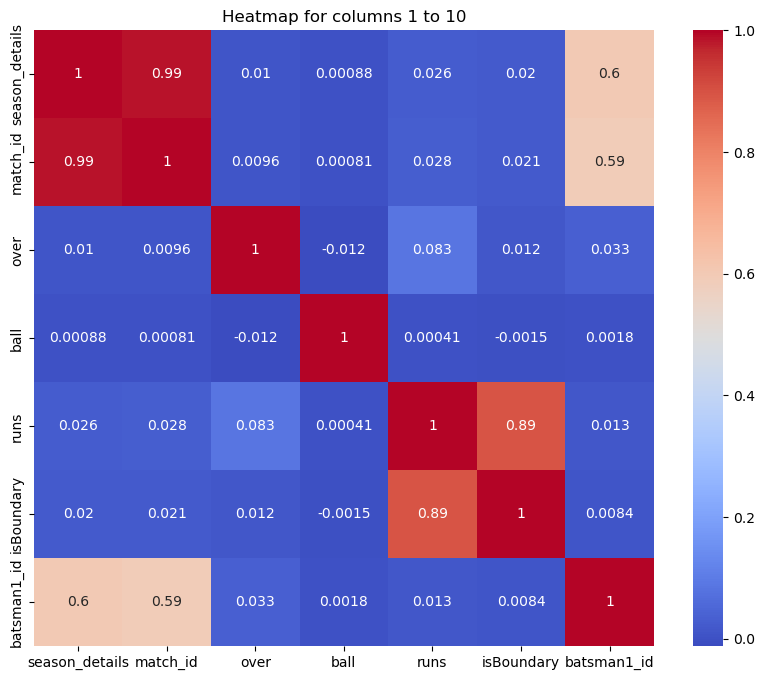

C:\Users\Arya\AppData\Local\Temp\ipykernel_7792\347107160.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataNew_high_variance[cols].corr()


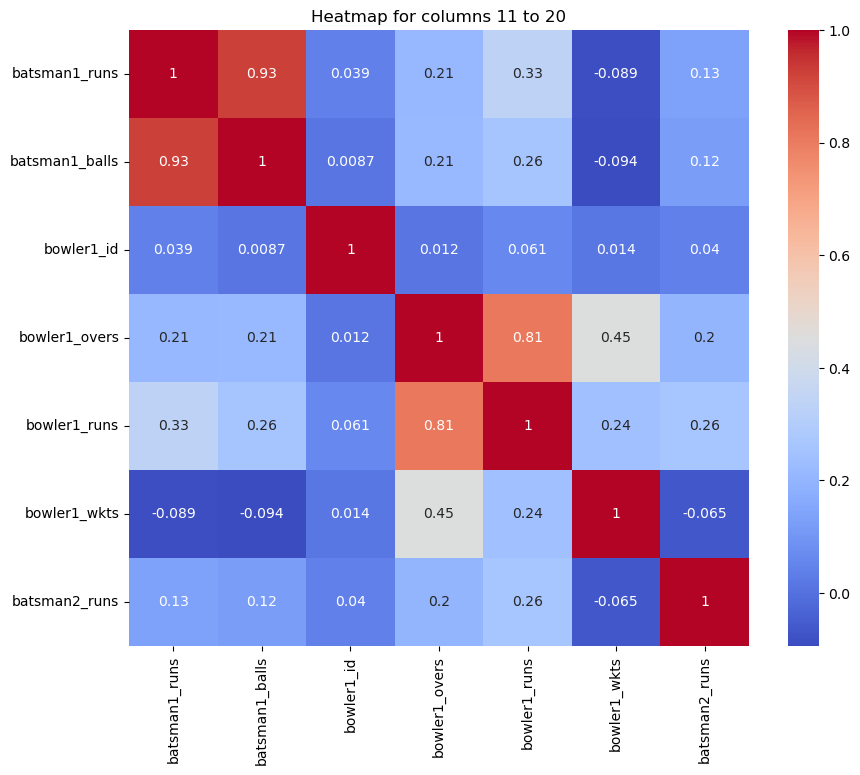

C:\Users\Arya\AppData\Local\Temp\ipykernel_7792\347107160.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataNew_high_variance[cols].corr()


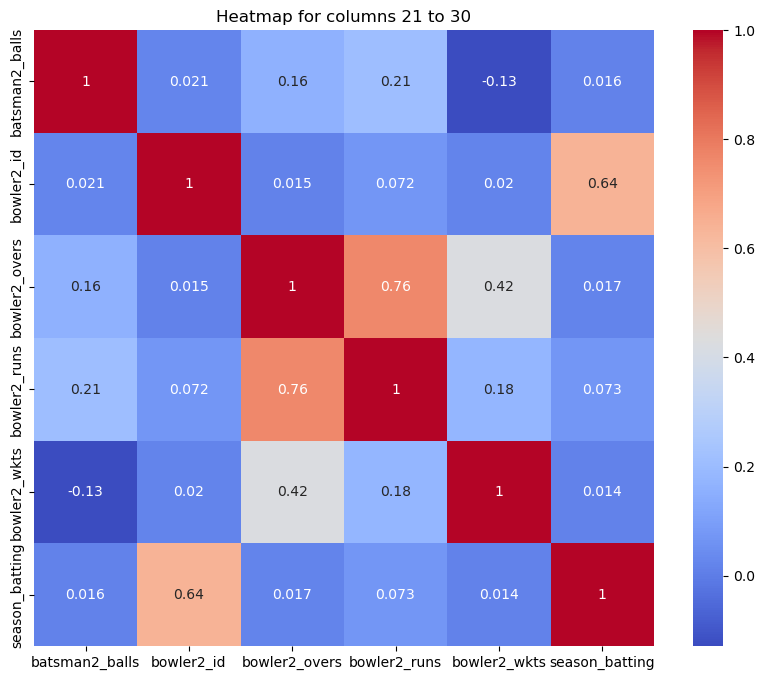

C:\Users\Arya\AppData\Local\Temp\ipykernel_7792\347107160.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataNew_high_variance[cols].corr()


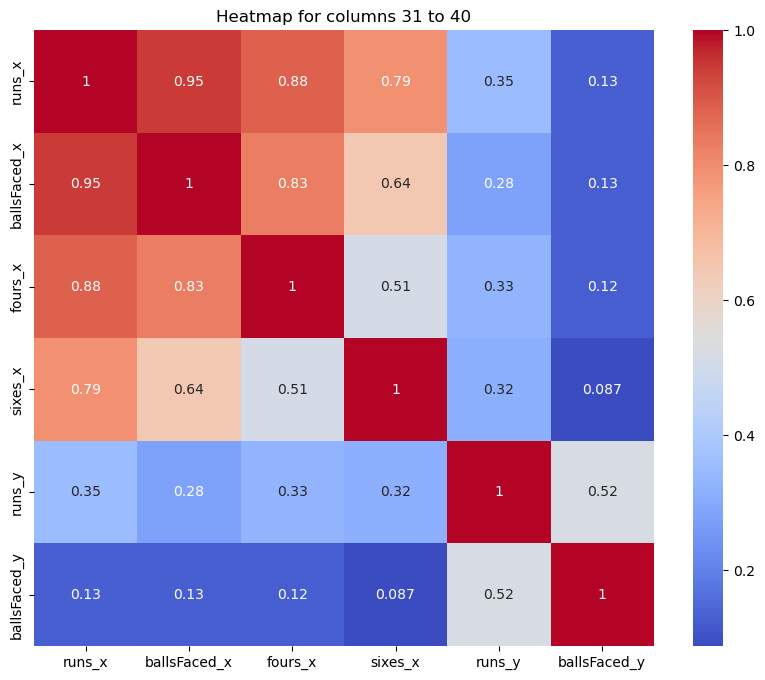

C:\Users\Arya\AppData\Local\Temp\ipykernel_7792\347107160.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataNew_high_variance[cols].corr()


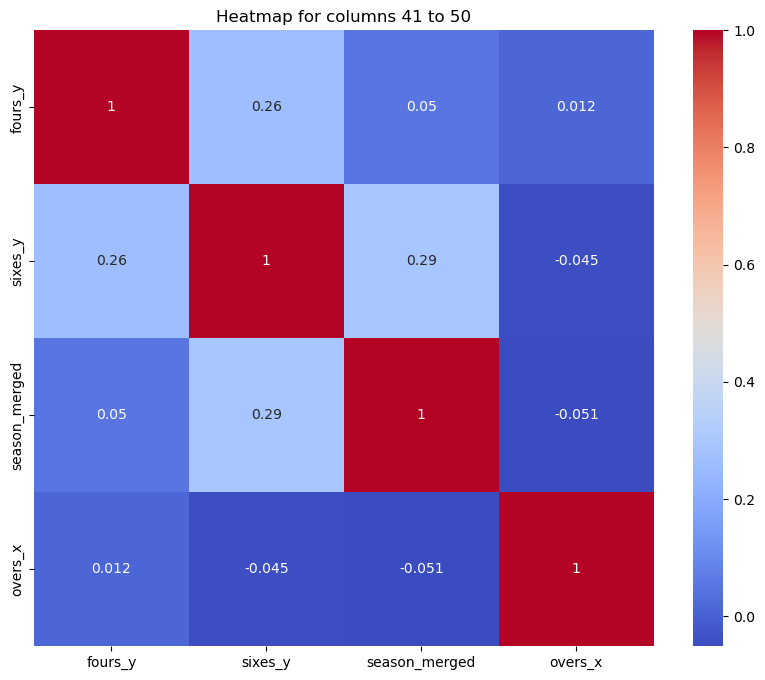

C:\Users\Arya\AppData\Local\Temp\ipykernel_7792\347107160.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataNew_high_variance[cols].corr()


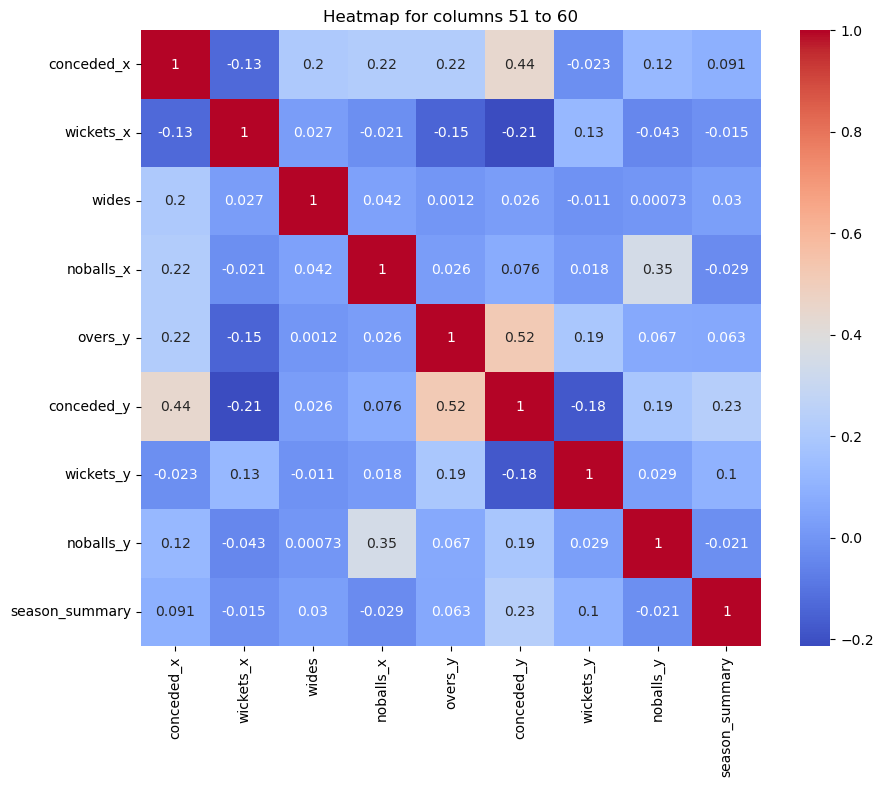

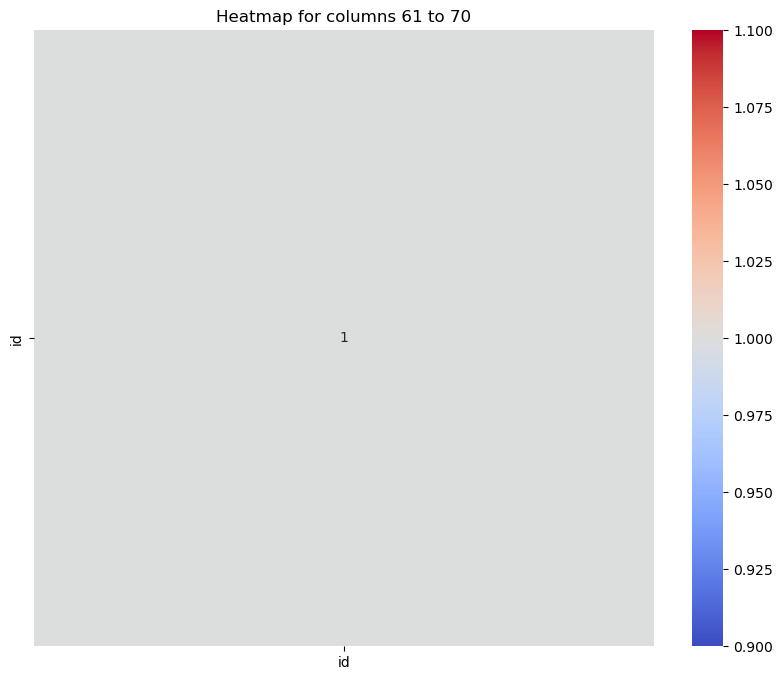

C:\Users\Arya\AppData\Local\Temp\ipykernel_7792\347107160.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataNew_high_variance[cols].corr()


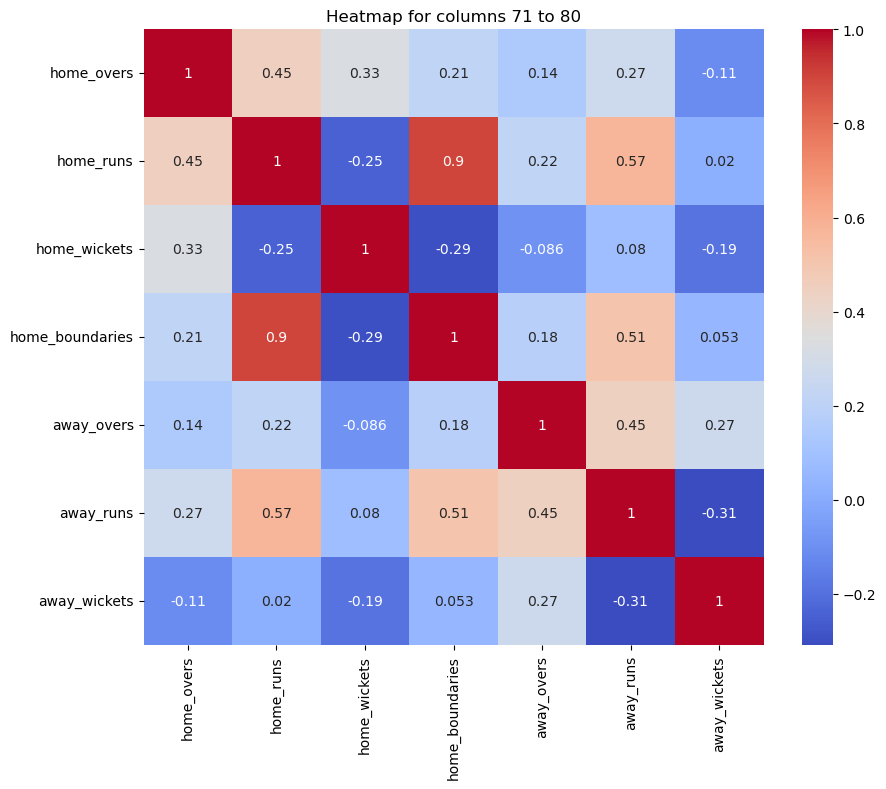

C:\Users\Arya\AppData\Local\Temp\ipykernel_7792\347107160.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataNew_high_variance[cols].corr()


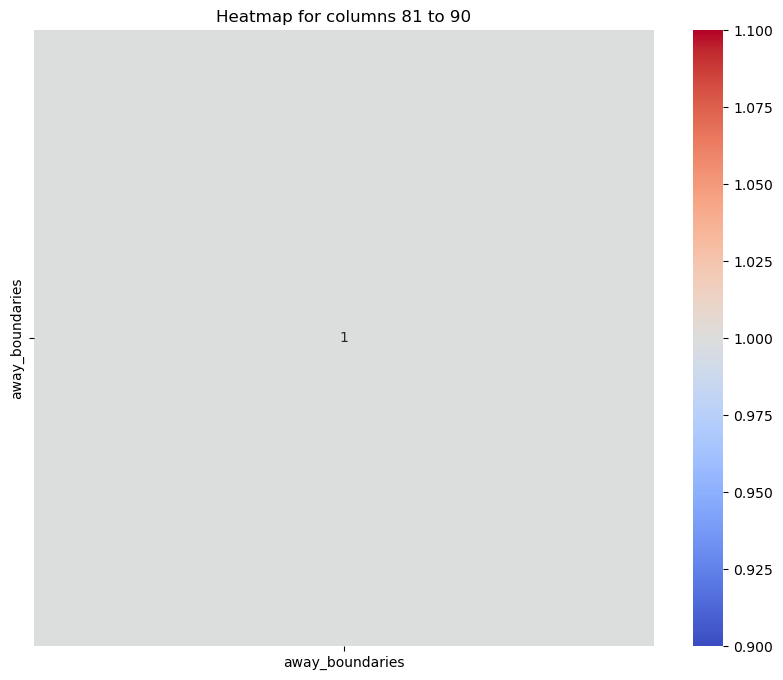

C:\Users\Arya\AppData\Local\Temp\ipykernel_7792\347107160.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataNew_high_variance[cols].corr()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>

In [82]:
import seaborn as sb
import matplotlib.pyplot as plt

num_cols = len(dataNew_high_variance.columns)

if 'winner' not in dataNew_high_variance.columns:
    print("The 'winner' column does not exist in the dataframe.")

for i in range(0, num_cols, 10):
    if i+10 < num_cols:
        cols = dataNew_high_variance.columns[i:i+10]
    else:
        cols = dataNew_high_variance.columns[i:]

    if 'winner' not in cols:
        cols = cols.insert(len(cols), 'winner')

    corr = dataNew_high_variance[cols].corr()
    plt.figure(figsize=(10,8))
    sb.heatmap(corr, cmap='coolwarm', annot=True)
    plt.title(f"Heatmap for columns {i+1} to {i+10}")
    plt.show()

In [78]:

# Find pairs of features with correlation above 0.8
import pandas as pd

corr_matrix = dataNew_high_variance.corr().abs()

highly_correlated = (corr_matrix > 0.8) & (corr_matrix < 1.0)
pairs_above_threshold = [(i, j, corr_matrix.iloc[i, j]) for i in range(corr_matrix.shape[0]) for j in range(i+1, corr_matrix.shape[1]) if highly_correlated.iloc[i, j]]

# Print the pairs of features with correlation above 0.8
if len(pairs_above_threshold) == 0:
    print('No pairs of features with correlation above 0.8')
else:
    print('Pairs of features with correlation above 0.8:')
    for pair in pairs_above_threshold:
        print(f"{dataNew_high_variance.columns[pair[0]]} and {dataNew_high_variance.columns[pair[1]]} - Correlation: {pair[2]}")

C:\Users\Arya\AppData\Local\Temp\ipykernel_7792\271900313.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataNew_high_variance.corr().abs()


Pairs of features with correlation above 0.8:
season_details and match_id - Correlation: 0.9856586691119038
season_details and ballsFaced_y - Correlation: 0.9856586691119038
match_id and batsman2_runs - Correlation: 0.985658669111903
match_id and away_team_batting - Correlation: 0.985658669111903
match_id and runs_y - Correlation: 0.985658669111903
over and ball - Correlation: 0.8934084555544253
isBoundary and batsman1_id - Correlation: 0.9253904639243611
batsman1_runs and batsman1_balls - Correlation: 0.8087953861577817
bowler1_name and bowler1_overs - Correlation: 0.9312868140991937
batsman2_runs and ballsFaced_y - Correlation: 0.9856586691119038
batsman2_balls and bowler2_id - Correlation: 0.9454543502270116
batsman2_balls and bowler2_name - Correlation: 0.8828639276966475
bowler2_id and bowler2_name - Correlation: 0.8310858958567336
bowler2_runs and ballsFaced_x - Correlation: 0.9961685116589263
bowler2_runs and sixes_y - Correlation: 0.8800336658535743
bowler2_runs and venue_bowli

In [83]:
# Remove one column from each highly correlated pair
columns_to_drop = set()
for pair in pairs_above_threshold:
    columns_to_drop.add(dataNew_high_variance.columns[pair[1]])

dataNew_high_variance_filtered = dataNew_high_variance.drop(columns=columns_to_drop)
print("Shape of DataFrame after removing highly correlated features:", dataNew_high_variance_filtered.shape)

Shape of DataFrame after removing highly correlated features: (242551, 74)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model for each annotation
models = {}
for annotation in annotations:
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train[annotation])
    models[annotation] = model

# Make predictions
y_preds = {}
for annotation in annotations:
    y_pred = models[annotation].predict(X_test)
    y_preds[annotation] = y_pred

# Evaluate the models
rf_accuracies = {}
for annotation in annotations:
    accuracy = accuracy_score(y_test[annotation], y_preds[annotation])
    rf_accuracies[annotation] = accuracy

print("Accuracy for each annotation:")
for annotation, accuracy in rf_accuracies.items():
    print(f"{annotation}: {accuracy}")

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model for each annotation
models = {}
for annotation in annotations:
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train[annotation])
    models[annotation] = model

# Make predictions
y_preds = {}
for annotation in annotations:
    y_pred = models[annotation].predict(X_test)
    y_preds[annotation] = y_pred

# Evaluate the models
lr_accuracies = {}
for annotation in annotations:
    accuracy = accuracy_score(y_test[annotation], y_preds[annotation])
    lr_accuracies[annotation] = accuracy

print("Accuracy for each annotation:")
for annotation, accuracy in lr_accuracies.items():
    print(f"{annotation}: {accuracy}")